In [1]:
import geomalgo as ga
%load_ext Cython
%load_ext wurlitzer
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%%cython

from libc.stdio cimport printf
cimport geomalgo as ga

cdef:
    ga.CPoint2D A
    
A.x = 1
A.y = 2

printf("A: (%.1f, %.1f)\n", A.x, A.y)

A: (1, 2)


In [3]:
%%cython

from libc.stdio cimport printf
cimport geomalgo as ga

cdef:
    ga.CPoint2D* A
    
A = ga.new_point2d()

A.x = 1
A.y = 2

printf("A: (%.1f, %.1f)\n", A.x, A.y)

ga.del_point2d(A)

A: (1, 2)


A: Point2D(1.0, 2.0)


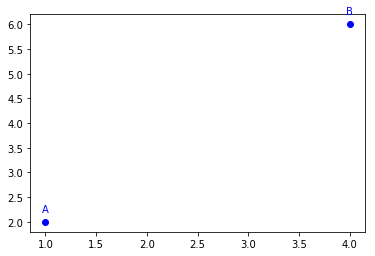

In [4]:
A = ga.Point2D(1, 2, name='A')
B = ga.Point2D(4, 6, name='B')
print('A:', A)
A.plot()
B.plot()

In [5]:
%%cython

from libc.stdio cimport printf
cimport geomalgo as ga

cdef:
    ga.Point2D A
    ga.CPoint2D* ptr

A = ga.Point2D(1, 2)

ptr = A.cpoint2d
printf("(%.1f, %.1f)\n", ptr.x, ptr.y)

(1, 2)


In [6]:
%%cython

from libc.stdio cimport printf
cimport geomalgo as ga

cdef:
    ga.CPoint2D A
    
A.x, A.y = 1, 2
printf("A: (%.1f, %.1f)\n", A.x, A.y)
    
A.x, A.y = 4, -5
printf("A: (%.1f, %.1f)\n", A.x, A.y)

A: (1.0, 2.0)
A: (4.0, -5.0)


In [7]:
A = ga.Point2D(1, 2)
print(A)

A.x, A.y = 4, -5
print(A)

Point2D(1.0, 2.0)
Point2D(4.0, -5.0)


In [8]:
%%cython

from libc.stdio cimport printf
cimport geomalgo as ga

cdef:
    ga.CPoint2D A, B
    ga.CVector2D AB
    
A.x, A.y = 1, 2
B.x, B.y = 4, 6

ga.subtract_points2d(&AB, &B, &A)

printf("AB: (%.1f, %.1f)\n", AB.x, AB.y)

AB: (3.0, 4.0)


In [9]:
A = ga.Point2D(1, 2)
B = ga.Point2D(4, 6)
AB = B - A
print('AB: ({}, {})'.format(AB.x, AB.y))

AB: (3.0, 4.0)


In [10]:
%%cython

from libc.stdio cimport printf
cimport geomalgo as ga

cdef:
    ga.CPoint2D A, B
    ga.CVector2D AB
    
A.x, A.y = 1, 2
AB.x, AB.y = 1.5, 2

ga.point2d_plus_vector2d(&B, &A, 2., &AB)

printf("B: (%.1f, %.1f)", B.x, B.y)

B: (4.0, 6.0)

In [11]:
A = ga.Point2D(1, 2)
AB = ga.Vector2D(1.5, 2)

B = A + AB*2

print(B)

Point2D(4.0, 6.0)


In [12]:
%%cython

from libc.stdio cimport printf
cimport geomalgo as ga

cdef:
    ga.CPoint2D A, B, C
    
A.x, A.y = 1, 2
B.x, B.y = 1, 2
C.x, C.y = 2, 2

printf("A==B: %d\n", ga.point2d_equal(&A, &B))
printf("A==C: %d\n", ga.point2d_equal(&A, &C))

A==B: 1
A==C: 0


In [13]:
%%cython

from libc.stdio cimport printf
cimport geomalgo as ga

cdef:
    ga.CPoint2D A, B
    double dist
    
A.x, A.y = 1, 2
B.x, B.y = 4, 6
dist = ga.point2d_distance(&A, &B)
printf("distance: %.1f", dist)

distance: 5.0

In [14]:
A = ga.Point2D(1, 2)
B = ga.Point2D(4, 6)
A.distance(B)

5.0

In [22]:
%%cython

from libc.stdio cimport printf
cimport geomalgo as ga

cdef:
    ga.CPoint2D A, B
    double sdist
    
A.x, A.y = 1, 2
B.x, B.y = 4, 6
sdist = ga.point2d_square_distance(&A, &B)
printf("square distance: %.1f", sdist)

square distance: 25.0 

P is left AB: True
P is left BA: False

Q is left AB: False
Q is left BA: True


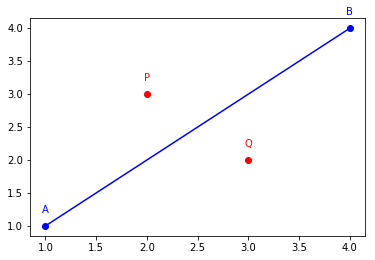

In [2]:
A = ga.Point2D(1, 1, name='A')
B = ga.Point2D(4, 4, name='B')
P = ga.Point2D(2, 3, name='P')
Q = ga.Point2D(3, 2, name='Q')

AB = ga.Segment2D(A, B)

for obj in [A, B, AB]:
    obj.plot()
    
for obj in [P, Q]:
    obj.plot(color='red')
    
print('P is left AB:', P.is_left(A, B))
print('P is left BA:', P.is_left(B, A))
print()
print('Q is left AB:', Q.is_left(A, B))
print('Q is left BA:', Q.is_left(B, A))

R in on line (AB)
S is left AB: True
S in on line (AB)


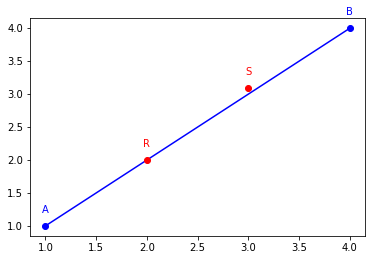

In [3]:
for obj in [A, B, AB]:
    obj.plot()
    
R = ga.Point2D(2, 2, name='R')
S = ga.Point2D(3, 3.1, name='S')
for obj in [R, S]:
    obj.plot(color='red')

try:
    R.is_left(B, A)
except ValueError as err:
    print(err)
    
print('S is left AB:', S.is_left(A, B))

try:
    S.is_left(A, B, isclose=lambda x,y: abs(x-y)<0.5)
except ValueError as err:
    print(err)

In [27]:
%%cython

from libc.stdio cimport printf
cimport geomalgo as ga

cdef:
    ga.CPoint2D A, B, P, R
    
A.x, A.y = 1, 1
B.x, B.y = 4, 4

P.x, P.y = 2, 3
R.x, R.y = 2, 2

printf('P is left AB: %.2f\n', ga.is_left(&A, &B, &P))
printf('P is left BA: %.2f\n', ga.is_left(&B, &A, &P))
printf('R is left AB: %.2f\n', ga.is_left(&A, &B, &R))

P is left AB: 3.00
P is left BA: -3.00
R is left AB: 0.00 
